In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Artists_Dataset.csv")

In [3]:
data

,Index,Artist Name,Gender,Primary Genre,Birthday,Year Debut Studio Album Released,Debut Album,Debut Album First Week Sales,Age At The Time of First Released Album,Earliest Monthly Listeners,...,Grok Memorability Rating,Grok Score,Grok High Achievement Score Prediction,Total RIAA Certifications,Total Billboard 100 Entries,Total Spotify Monthly Listeners,Total Spotify Streams,Total Spotify Playlists Appearances,Total YouTube Views,Achievement Score
0,1,Famous Dex,Male,Hip-Hop/Rap,6-Sep-1993,2018,Dex Meets Dexter,"25,000",24,"6,908,770",...,4.0,14.0,1,3,2,"2,754,966","1,497,949,068","10,300","294,975,911",3.730750
1,2,Ugly God,Male,Hip-Hop/Rap,19-Sep-1996,2019,Bumps & Bruises,"14,000",22,"1,600,316",...,3.0,10.0,0,1,2,"494,393","573,965,949","4,575","71,520,502",1.490087
2,3,Lil Yachty,Male,Hip-Hop/Rap,23-Aug-1997,2017,Teenage Emotions,"46,000",19,"11,236,000",...,3.0,11.0,0,14,21,"18,435,135","9,643,202,826","44,400","967,857,234",20.573076
3,4,6ix9ine,Male,Hip-Hop/Rap,8-May-1996,2018,Dummy Boy,"66,000",22,"24,558,267",...,3.0,13.0,1,17,20,"9,138,330","6,864,642,791","24,100","7,907,552,370",20.869925
4,5,Trippie Redd,Male,Hip-Hop/Rap,18-Jun-1999,2018,Life's A Trip,"72,000",19,"10,810,183",...,1.0,6.0,0,42,35,"24,924,486","14,363,503,810","38,200","1,731,861,581",32.468759
5,6,XXXTENTACION,Male,Hip-Hop/Rap,23-Jan-1998,2017,17,"87,000",19,"33,034,822",...,3.0,13.0,0,34,35,"38,430,077","30,321,052,755","48,400","9,331,426,491",46.695937
6,7,Playboi Carti,Male,Hip-Hop/Rap,13-Aug-1996,2018,Die Lit,"61,000",21,"5,519,979",...,3.0,10.0,1,8,17,"46,123,040","12,009,899,596","32,900","570,005,201",23.980393
7,8,Lil Uzi Vert,Male,Hip-Hop/Rap,31-Jul-1994,2017,Luv is Rage 2,"135,000",23,"12,978,923",...,3.0,12.5,1,32,108,"34,696,514","24,686,003,646","57,800","4,035,024,186",50.909866
8,9,Blueface,Male,Hip-Hop/Rap,20-Jan-1997,2020,Find The Beat,"12,000",23,"13,154,305",...,3.0,7.0,0,4,3,"4,447,939","2,749,387,360","16,000","1,120,733,851",6.329950
9,10,Juice WRLD,Male,Hip-Hop/Rap,2-Dec-1998,2018,Goodbye & Good Riddance,"39,000",20,"21,782,231",...,3.0,13.0,1,74,80,"31,690,004","34,744,602,387","55,100","7,126,682,389",62.180582


In [5]:
from sklearn.model_selection import train_test_split

# Convert all strings to floats
data["Debut Album First Week Sales"] = [float(str(i).replace(",", "")) for i in data["Debut Album First Week Sales"]]
data["Percent Increase In Monthly Listeners"] = [float(str(i).replace(",", "")) for i in data["Percent Increase In Monthly Listeners"]]
data["Average Number of Days Between Release Dates"] = [float(str(i).replace(",", "")) for i in data["Average Number of Days Between Release Dates"]]
data["Gender"] = data["Gender"].apply(lambda x: 1 if x == "Male" else 0)

# Only include predictor columns for data regression
X = data.drop(['Achievement Score', 'Index', 'Primary Genre', 'Birthday', 'Year Debut Studio Album Released', 'Debut Album', 'Earliest Monthly Listeners', 'Monthly Listeners 3 Years Later or Latest', 'Most Streamed Song Within 3 Years of Debut Album', 'Most Streamed Song Within 3 Years of Debut Album Number of Streams', 'ChatGPT Lyric Rating', 'ChatGPT Language and Wordplay Rating', 'ChatGPT Originality and Uniqueness Rating', 'ChatGPT Memorability Rating', 'Grok Lyric Rating', 'Grok Language and Wordplay Rating', 'Grok Originality and Uniqueness Rating', 'Grok Memorability Rating', 'Total RIAA Certifications', 'Total Billboard 100 Entries', 'Total Spotify Monthly Listeners', 'Total Spotify Playlists Appearances', 'Total YouTube Views', 'Total Spotify Streams', 'Artist Name'], axis=1)
y = data['Achievement Score']

In [6]:
# Train model with 80% of the dataset, and test the other 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)

In [8]:
train_data

,Gender,Debut Album First Week Sales,Age At The Time of First Released Album,Percent Increase In Monthly Listeners,Billboard 100 Entries Within 3 Years of Debut Album,Average Number of Days Between Release Dates,RIAA Certifications Within 3 Years of Debut Album,ChatGPT Score,ChatGPT High Achievement Score Prediction,Grok Score,Grok High Achievement Score Prediction,Achievement Score
21,1,45000.0,17,-67.11,9,466.0,10,5.0,0,9.0,0,13.586837
48,1,43000.0,20,-52.17,6,779.0,14,14.0,1,15.5,1,13.040078
45,1,67000.0,21,-19.63,29,292.0,22,13.0,1,11.0,0,30.591233
46,1,43000.0,18,175.28,63,63.0,50,12.5,1,14.0,1,66.858276
26,1,17000.0,25,-9.82,0,907.0,4,12.0,1,11.0,0,6.738997
9,1,39000.0,20,60.63,69,316.0,23,12.0,1,13.0,1,62.180582
34,1,58000.0,21,-5.48,44,329.0,14,15.0,1,14.0,1,71.289892
38,1,4000.0,13,-37.96,0,388.0,0,9.0,1,9.0,0,0.724987
3,1,66000.0,22,-67.55,17,638.0,17,13.0,1,13.0,1,20.869925
19,1,20000.0,21,162.74,1,234.0,1,11.0,1,14.0,1,6.491895


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Debut Album First Week Sales'}>,
        <Axes: title={'center': 'Age At The Time of First Released Album'}>],
       [<Axes: title={'center': 'Percent Increase In Monthly Listeners'}>,
        <Axes: title={'center': 'Billboard 100 Entries Within 3 Years of Debut Album'}>,
        <Axes: title={'center': 'Average Number of Days Between Release Dates'}>],
       [<Axes: title={'center': 'RIAA Certifications Within 3 Years of Debut Album'}>,
        <Axes: title={'center': 'ChatGPT Score'}>,
        <Axes: title={'center': 'ChatGPT High Achievement Score Prediction'}>],
       [<Axes: title={'center': 'Grok Score'}>,
        <Axes: title={'center': 'Grok High Achievement Score Prediction'}>,
        <Axes: title={'center': 'Achievement Score'}>]], dtype=object)

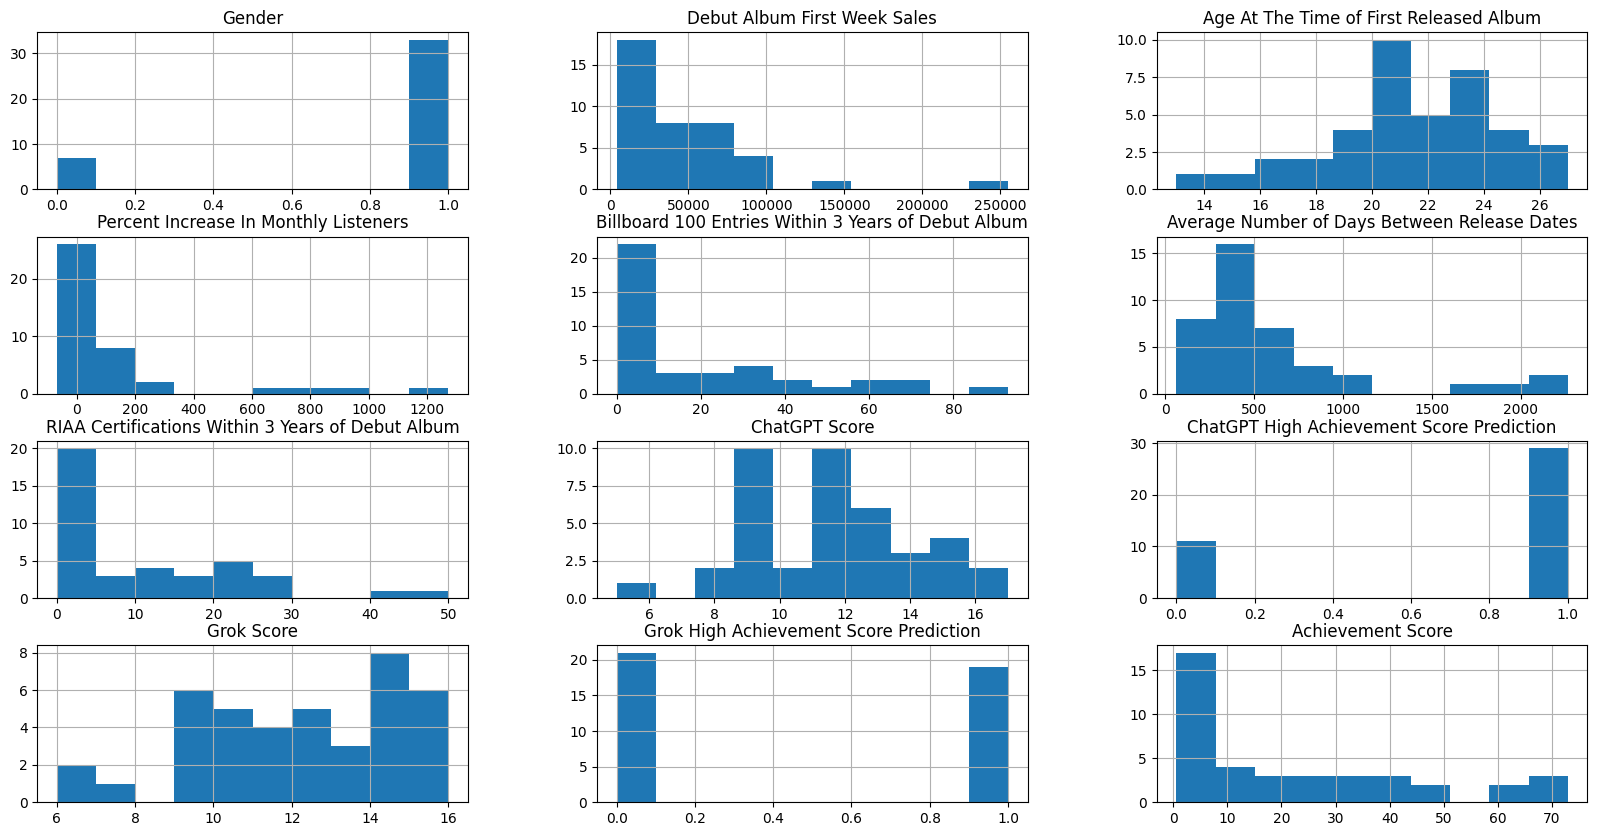

In [9]:
# Create histogram with training set to see allocation of columns
train_data.hist(figsize=(20,10))

<Axes: >

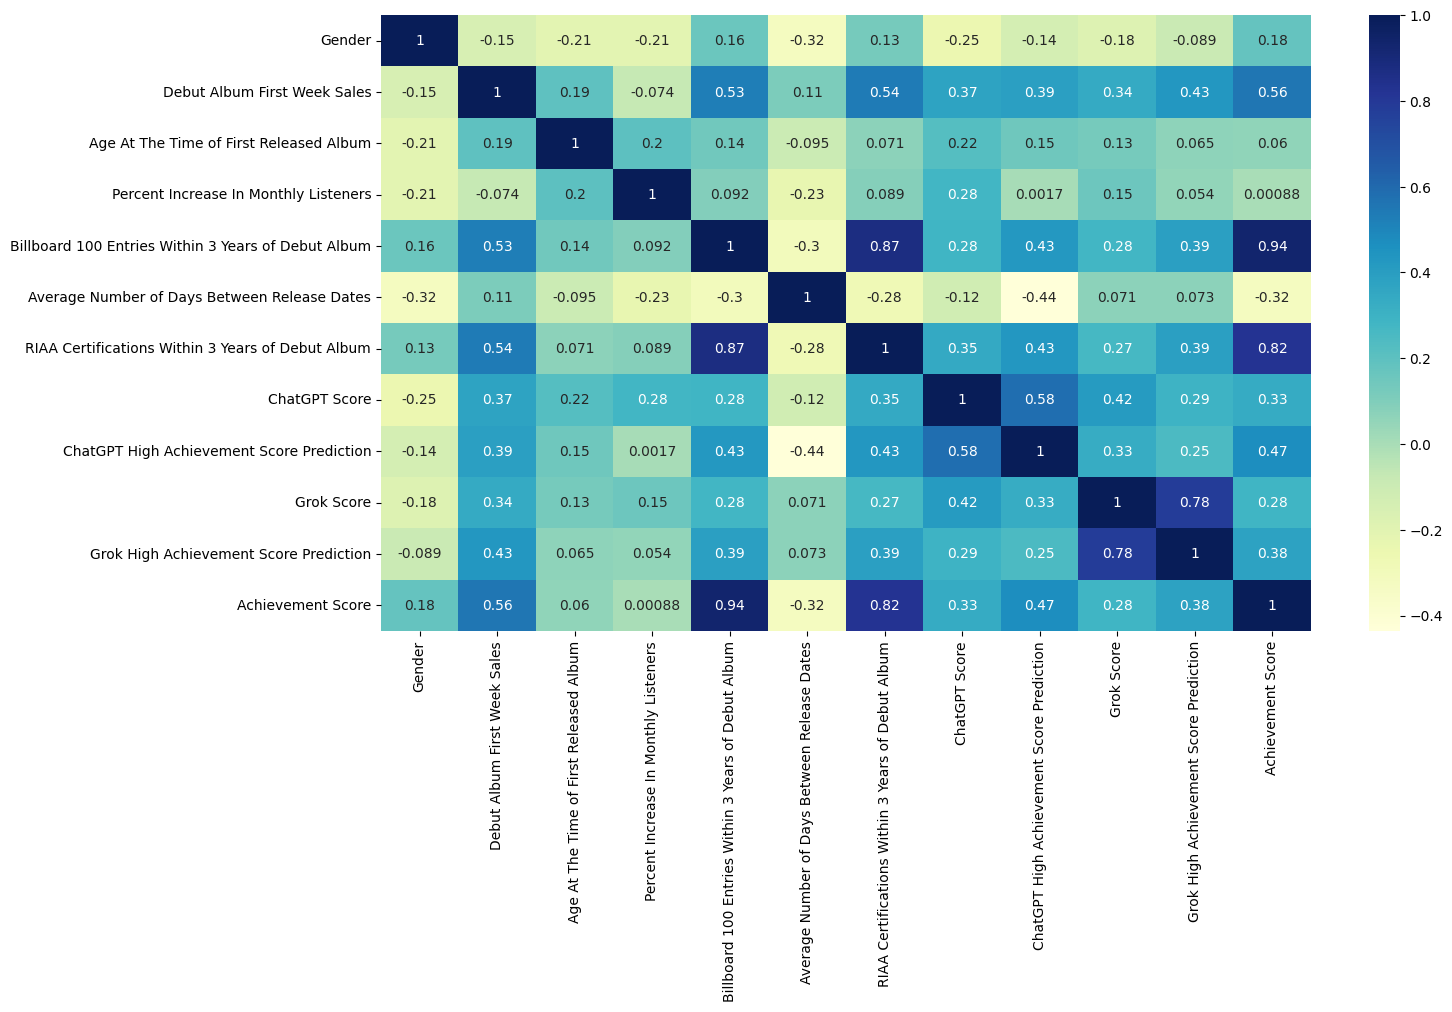

In [11]:
# Create heatmap showing correlations of each column to one another
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [12]:
# Define test data (20% of the dataset)
test_data = X_test.join(y_test)

In [13]:
test_data

,Gender,Debut Album First Week Sales,Age At The Time of First Released Album,Percent Increase In Monthly Listeners,Billboard 100 Entries Within 3 Years of Debut Album,Average Number of Days Between Release Dates,RIAA Certifications Within 3 Years of Debut Album,ChatGPT Score,ChatGPT High Achievement Score Prediction,Grok Score,Grok High Achievement Score Prediction,Achievement Score
40,0,5000.0,22,1750.29,18,359.0,10,16.0,1,15.0,1,45.418398
39,1,28000.0,21,-46.78,0,2150.0,1,11.0,1,16.0,1,3.036747
33,1,45000.0,18,50.62,14,399.0,16,15.0,1,14.0,1,19.951668
30,1,4000.0,21,-62.68,2,1596.0,3,13.0,1,14.0,1,2.824583
43,1,4000.0,17,-39.74,0,286.0,0,8.0,0,15.0,1,0.171597
42,1,4000.0,24,-60.58,0,616.0,0,8.0,0,15.0,1,3.518049
25,1,16000.0,19,-5.91,4,1399.0,2,9.0,1,8.0,0,7.591030
15,1,25554.0,21,-5.09,0,836.0,5,15.0,1,15.0,1,5.895265
13,1,4000.0,21,28.16,3,665.0,3,10.0,0,9.0,0,4.465855
37,1,36000.0,28,15.27,10,255.0,11,11.0,1,9.0,0,14.733839


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor
forest = RandomForestRegressor()

# Fit the training data to the forest regressor
forest.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Calculate r^2 value using test data
forest.score(X_test, y_test)

0.6299453652896607

In [26]:
from sklearn.model_selection import GridSearchCV

# Create new random forest regressor
forest = RandomForestRegressor()

# Create a parameter grid to see if there are other parameters that produce higher results
param_grid = {
    "n_estimators": [300, 350, 400, 410, 420, 430, 450],
    "min_samples_split": [2, 4, 6, 8],
    "max_depth": [None, 4, 8, 10, 12, 13, 14, 15, 16, 20]
}

# Create Grid Search CV
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8, 10, 12, 13, 14, 15, 16, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 350, 400, 410, 420, 430, 450]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=300)

In [46]:
grid_search.best_estimator_.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300)

In [54]:
grid_search.best_estimator_.score(X_test, y_test)

0.6382244720219308

In [55]:
# Extracting relevant columns for predictions
prediction_data = data[[
    'Gender',
    'Debut Album First Week Sales',
    'Age At The Time of First Released Album',
    'Percent Increase In Monthly Listeners',
    'Billboard 100 Entries Within 3 Years of Debut Album',
    'Average Number of Days Between Release Dates',
    'RIAA Certifications Within 3 Years of Debut Album',
    'ChatGPT Score',
    'ChatGPT High Achievement Score Prediction',
    'Grok Score',
    'Grok High Achievement Score Prediction'
]]

# Make predictions for the dataset using each artists's predictor columns
predictions = forest.predict(prediction_data)

# Add prediction scores to the original DataFrame
data['Achievement Score Prediction'] = predictions

# Print the DataFrame with predictions
print(data[['Artist Name', 'Achievement Score', 'Achievement Score Prediction']])

                   Artist Name  Achievement Score  \
0                   Famous Dex           3.730750   
1                     Ugly God           1.490087   
2                   Lil Yachty          20.573076   
3                      6ix9ine          20.869925   
4                 Trippie Redd          32.468759   
5                 XXXTENTACION          46.695937   
6                Playboi Carti          23.980393   
7                 Lil Uzi Vert          50.909866   
8                     Blueface           6.329950   
9                   Juice WRLD          62.180582   
10                 Comethazine           3.512395   
11                Tee Grizzley           7.223957   
12         Megan Thee Stallion          27.102912   
13                  YBN Nahmir           4.465855   
14                Almighty Jay           0.892095   
15                      Cordae           5.895265   
16                   Young M.A           4.244398   
17                  City Girls           6.438

In [56]:
data.to_csv('Artists_Data_With_Predictions.csv', index=False)